## Project Euler progress plot generator.
Example plot:
https://github.com/omanshuthapliyal/blog-posts_accompanying-code/blob/main/PE-progress.png


Instructions:
Assumes the CSV is titled: pe_minimal_problems.csv.

You might need to modify the column title of the CSV you get from your project Euler progress page. This script uses the first column, titled ['ID'], and last column (which you need to retitle) to ['Solve Status'].
For some reason, CSV generated from Euler has column titles messed up (as of Oct0ber 2025).

I use my own color scheme:

<font color="#fff3de">**fff3de**</font>,
<font color="#c8d0ca">**c8d0ca**</font>, <font color="#8c1515">**8c1515**</font>


In [2]:
import pandas as pd

# Read CSV
df = pd.read_csv("pe_minimal_problems.csv")

# Only keep relevant columns
df = df[['ID', 'Solve Status']]

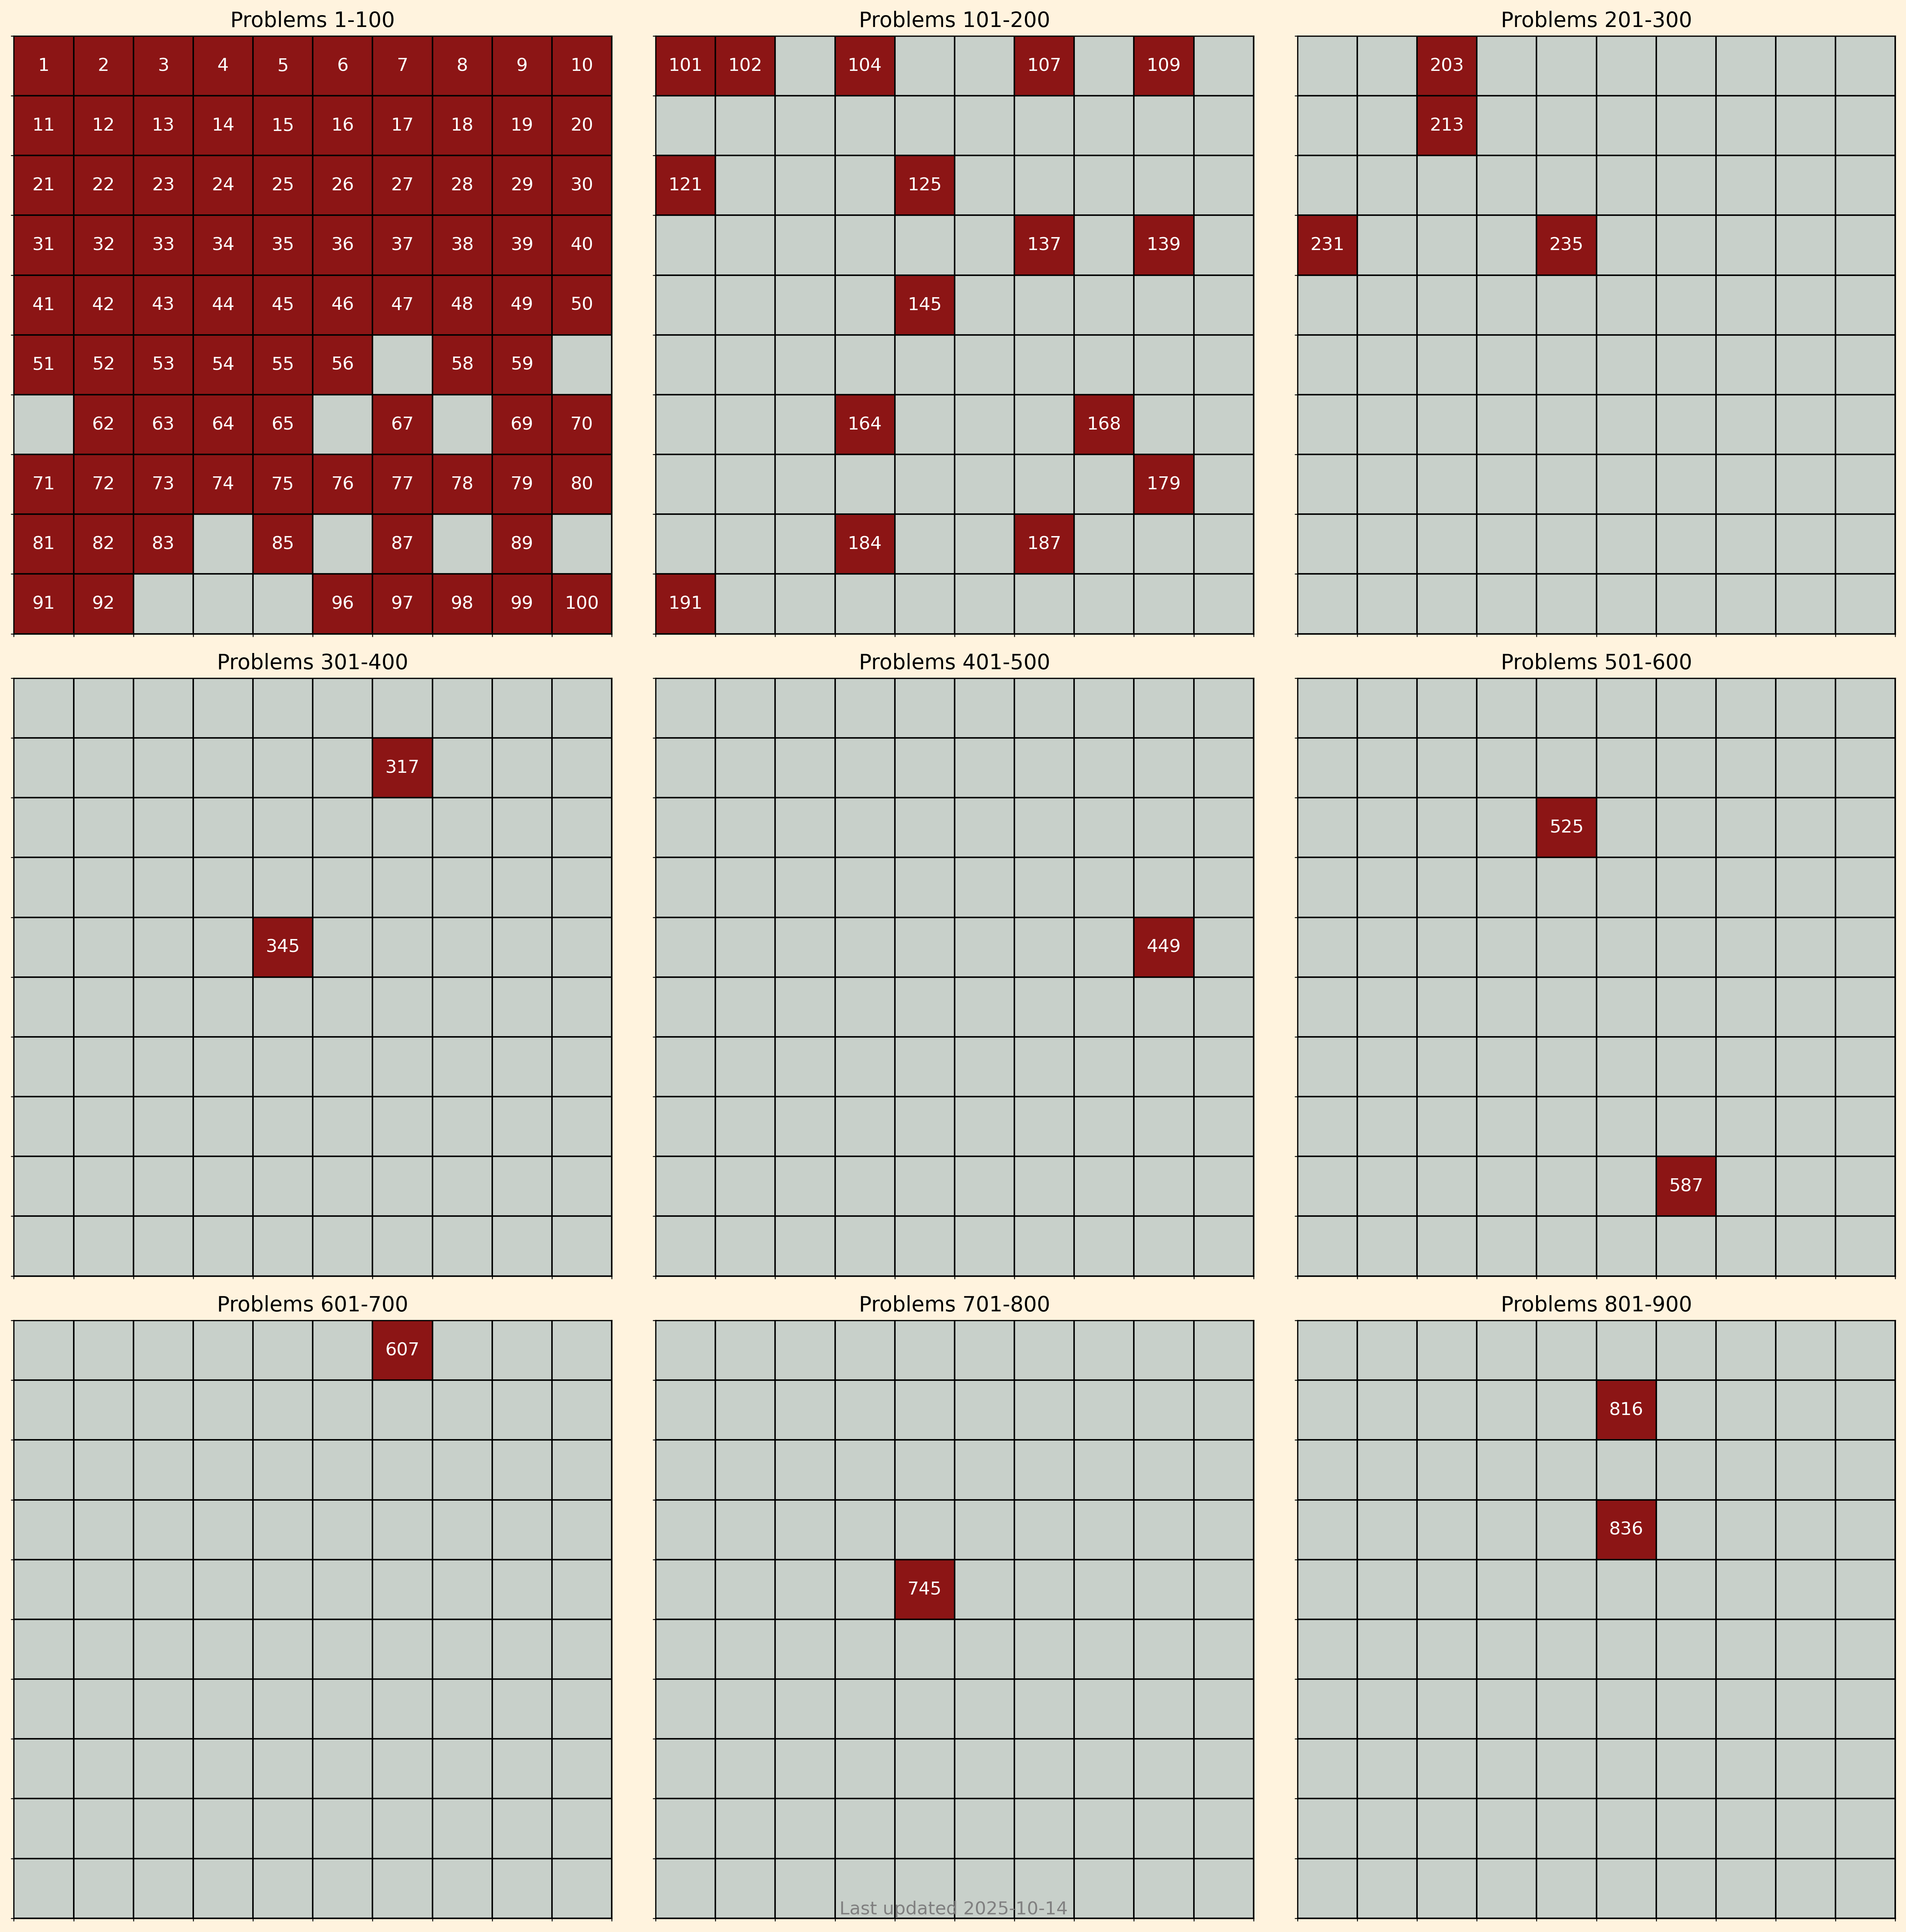

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from datetime import date

matrix_size = 10          # Each subplot is 10x10
problems_per_matrix = 100 # Each subplot covers 100 problems
num_matrices = 9          # First 9 matrices (problems 1-900)

# Example DataFrame
# df should have columns: 'ID' (int) and 'Solve Status' (0 or 1)
# import pandas as pd
# df = pd.DataFrame({'ID': range(1, 901), 'Solve Status': np.random.randint(0, 2, 900)})

today = date.today().strftime("%Y-%m-%d")

# Create a custom colormap: 0 = white (unsolved), 1 = dark red (#8c1515)
cmap = ListedColormap(['#c8d0ca', '#8c1515'])

# Increase figure size and DPI, set figure background color
fig, axes = plt.subplots(3, 3, figsize=(18, 18), dpi=300, facecolor='#fff3de')
axes = axes.flatten()

for i in range(num_matrices):
    start_id = i * problems_per_matrix + 1
    end_id = start_id + problems_per_matrix - 1

    block = df[(df['ID'] >= start_id) & (df['ID'] <= end_id)]

    mat = np.zeros((matrix_size, matrix_size))

    for _, row in block.iterrows():
        pid = row['ID']
        solved = row['Solve Status']
        idx = pid - start_id
        row_idx = idx // matrix_size
        col_idx = idx % matrix_size
        mat[row_idx, col_idx] = solved

    ax = axes[i]
    ax.set_facecolor('#fff3de')  # subplot background
    ax.imshow(mat, cmap=cmap, vmin=0, vmax=1)

    # Add grid lines
    ax.set_xticks(np.arange(-0.5, matrix_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, matrix_size, 1), minor=True)
    ax.grid(which='minor', color='black', linewidth=1)

    # Annotate solved cells
    for row_idx in range(matrix_size):
        for col_idx in range(matrix_size):
            if mat[row_idx, col_idx] == 1:
                pid = start_id + row_idx * matrix_size + col_idx
                ax.text(col_idx, row_idx, str(pid),
                        ha='center', va='center',
                        color='white', fontsize=12)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Problems {start_id}-{end_id}', fontsize=14)

plt.tight_layout()

# Footer with last updated
fig.text(0.5, 0.01, f"Last updated {today}", ha='center', va='bottom',
         fontsize=12, color='gray')

# Save figure
plt.savefig("project_euler_progress.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()
